<class 'numpy.int64'>


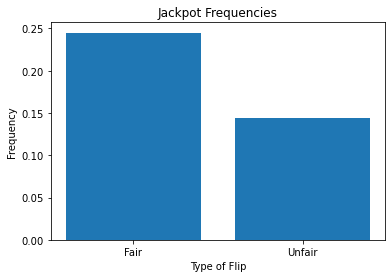

In [5]:
import montecarlo
import matplotlib.pyplot as plt


# Scenario 1

list_faces = ['H', 'T']
fair_coin= montecarlo.Die(list_faces)

unfair_coin= montecarlo.Die(list_faces)
h= list_faces[0]
unfair_coin.change_weight(h,1)
unfair_coin.change_weight(list_faces[1],5)


#2. Play a game of 1000 flips with all fair #dice.
list_coins_fair = [fair_coin, fair_coin]
game_fair = montecarlo.Game(list_coins_fair)
game_fair.play(1000)

list_coins_unfair= [unfair_coin, unfair_coin]
game_unfair = montecarlo.Game(list_coins_unfair) 
game_unfair.play(1000)


fair_analyzer = montecarlo.Analyzer(game_fair)
fair_frequency = fair_analyzer.jackpot()/1000
print(type(fair_analyzer.jackpot()))

unfair_analyzer = montecarlo.Analyzer(game_unfair)
unfair_frequency = unfair_analyzer.jackpot()/1000


labels = ['Fair', 'Unfair']
frequencies = [fair_frequency, unfair_frequency]

plt.bar(labels, frequencies)
plt.title('Jackpot Frequencies')
plt.xlabel('Type of Flip')
plt.ylabel('Frequency')
plt.show()


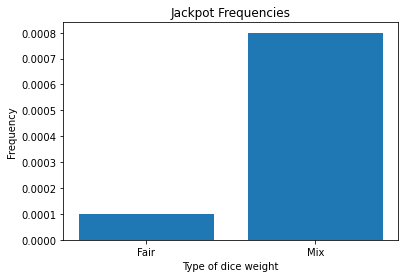

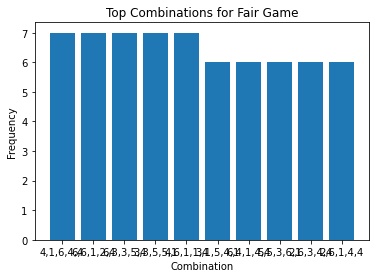

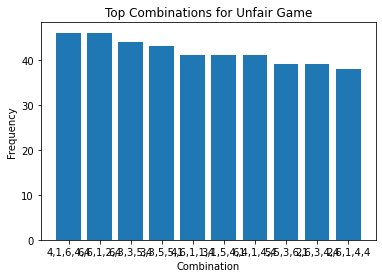

In [4]:
# Scenario 2

# create three die
list_sides = [1,2,3,4,5,6]
fair_die = montecarlo.Die(list_sides)

unfair_die_type1 = montecarlo.Die(list_sides)
unfair_die_type1.change_weight(6,5)

unfair_die_type2 = montecarlo.Die(list_sides)
unfair_die_type2.change_weight(1,5)

# play game
fair_dice_5 = [fair_die,fair_die,fair_die,fair_die,fair_die]
game_5_fair = montecarlo.Game(fair_dice_5)
game_5_fair.play(10000)


dice_mix = [unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die]
game_mix = montecarlo.Game(dice_mix)
game_mix.play(10000)

fair_5_analysis= montecarlo.Analyzer(game_5_fair)
fair_5_frequency = fair_5_analysis.jackpot()/10000

unfair_mix_analysis= montecarlo.Analyzer(game_mix)
unfair_mix_frequency = unfair_mix_analysis.jackpot()/10000

labels = ['Fair', 'Mix']
frequencies = [fair_5_frequency, unfair_mix_frequency]

plt.bar(labels, frequencies)
plt.title('Jackpot Frequencies')
plt.xlabel('Type of dice weight')
plt.ylabel('Frequency')
plt.show()

df_repeats_fair = fair_5_analysis.combo().iloc[:10]
df_repeats_unfair = unfair_mix_analysis.combo().iloc[:10]

label_counts_fair = df_repeats_fair["count"].values.tolist()
ten_columns_string_fair = '\n'.join(df_repeats_fair.iloc[:, 0:5].apply(lambda x: ','.join(x.astype(str)), axis=1))
label_list_fair = ten_columns_string_fair.split('\n')


plt.bar(label_list_fair, label_counts_fair)
plt.title('Top Combinations for Fair Game')
plt.xlabel('Combination')
plt.ylabel('Frequency')
plt.show()

label_counts_unfair = df_repeats_unfair["count"].values.tolist()
ten_columns_string_unfair = '\n'.join(df_repeats_unfair.iloc[:, 0:5].apply(lambda x: ','.join(x.astype(str)), axis=1))
label_list_unfair = ten_columns_string_fair.split('\n')

plt.bar(label_list_unfair, label_counts_unfair)
plt.title('Top Combinations for Unfair Game')
plt.xlabel('Combination')
plt.ylabel('Frequency')
plt.show()



In [3]:
# Scenario 3 : Letters of the Roman Alpha

faces = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
weights = (8.4966,2.0720,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635, 3.1671,
           0.1962, 7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722)
alpha_die = montecarlo.Die(faces)
for face, weight in zip(faces, weights):
    alpha_die.change_weight(face, weight)

list_5_alpha = [alpha_die,alpha_die,alpha_die,alpha_die,alpha_die]
alpha_game = montecarlo.Game(list_5_alpha)
alpha_game.play(1000)

alpha_analysis = montecarlo.Analyzer(alpha_game)
print(alpha_analysis.combo())

# I saw 4 combo's that had some english word in them
# that is four out of 10, which makes the frequency 40%
# none of the combos were repeated. this means that there 
# is a 40% chance of getting a word. 

     0  1  2  3  4  count
0    Z  E  O  E  F      1
1    G  L  C  N  E      1
2    H  H  Y  C  Z      1
3    H  H  M  U  A      1
4    H  H  I  R  S      1
..  .. .. .. .. ..    ...
995  O  N  R  B  N      1
996  O  N  P  R  A      1
997  O  N  O  I  C      1
998  O  N  N  B  C      1
999  A  A  A  E  G      1

[1000 rows x 6 columns]
